# Gibbs chain verification

In [49]:
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import healpy as hp
import astropy.io.fits as fits
import camb
import scipy
import toml
import jax
import jax.numpy as jnp
import jax.lax as jlax
import jax.scipy as jsp
import jax_healpy as jhp
import numpyro
from fgbuster.observation_helpers import *
import micmac as micmac

from jax import config
config.update("jax_enable_x64", True)

In [50]:
sys.path.append(os.path.dirname(os.path.abspath('')))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('')))+'/tutorials/')

In [51]:
working_directory_path = os.path.abspath('') + '/'
directory_save_file = working_directory_path + 'save_directory/'
directory_toml_file = working_directory_path + 'main_params/'
directory_additional_params = working_directory_path + 'additional_params/'


# Studying the sampling !

In [52]:
sub_step_sampling = 50
num_jobs = 1
file_ver = 'corr_fullsky_LB_d0s0_nside0_v109_v1a_{}_{}'
path_additional_params = directory_additional_params + 'add_corr_fullsky_LB_d0s0_nside0_v1a.toml'
## Paper run LB full sky !!!!

sub_step_sampling = 50
num_jobs = 1
file_ver = 'corr_fullsky_SO_d0s0_nside0_v109_v1a_{}_{}'
path_additional_params = directory_additional_params + 'add_corr_fullsky_SO_d0s0_nside0_v1a.toml'
## Paper run SO full sky !!!!

# sub_step_sampling = 50
# num_jobs = 1
# file_ver = 'corr_cutsky_LB_d0s0_nside0_v1091_v1a_{}_{}'
# path_additional_params = directory_additional_params + 'add_corr_cutsky_LB_d0s0_nside0_v1a.toml'
## Paper run LB cut sky !!!!

sub_step_sampling = 50
num_jobs = 1
file_ver = 'corr_cutsky_SO_d0s0_nside0_v1091_v1a12_{}_{}'
path_additional_params = directory_additional_params + 'add_corr_cutsky_SO_d0s0_nside0_v1a.toml'
# ## Paper run SO cut sky !!!!

# sub_step_sampling = 50
# num_jobs = 1
# file_ver = 'corr_cutsky_SO_d0s0_nside0_v1091_v1c2_{}_{}'
# path_additional_params = directory_additional_params + 'add_corr_cutsky_SO_d0s0_nside0_v1c.toml'
# ## Paper run SO cut sky ; r=0 !!!!

# sub_step_sampling = 50
# num_jobs = 1
# file_ver = 'corr_cutsky_LB_d0s0_nside0_v1091_r0_v1b_{}_{}'
# path_additional_params = directory_additional_params + 'add_corr_cutsky_LB_d0s0_nside0_v1b.toml'
## Paper run LB cut sky ; r=0 with more iterations !!!!

# sub_step_sampling = 50
# num_jobs = 1
# file_ver = 'corr_cutsky_LB_d0s0_nside0_v1091_r0_v1d_{}_{}'
# path_additional_params = directory_additional_params + 'add_corr_cutsky_LB_d0s0_nside0_v1d.toml'
## Paper run LB cut sky ; r=0 !!!!

# sub_step_sampling = 50
# num_jobs = 1
# file_ver = 'corr_cutsky_SO_d7s3_nside1_v1091_v1a_{}_{}'
# path_additional_params = directory_additional_params + 'add_corr_cutsky_SO_d7s3_nside1_v1a.toml'
##

# sub_step_sampling = 50
# num_jobs = 1
# file_ver = 'corr_cutsky_LB_d0s0_nside0_v1901_v2b_{}_{}'
# path_additional_params = directory_additional_params + 'add_corr_cutsky_LB_d0s0_nside0_v0b.toml'
## Paper run LB cut sky !!!!

In [53]:
load_Harm_MH = False

In [54]:
if load_Harm_MH:
    MH_number_iterations_sampling = 20000
    file_ver_MH = file_ver.format('Harm', MH_number_iterations_sampling)

    all_r_samples_Harm = np.load(directory_save_file + file_ver_MH + '_all_r_samples.npy')
    all_params_mixing_matrix_samples_Harm = np.load(directory_save_file + file_ver_MH + '_all_params_mixing_matrix_samples.npy')

In [55]:
with open(path_additional_params) as f:
    dictionary_additional_parameters = toml.load(f)
f.close()

reduction_noise = dictionary_additional_parameters['reduction_noise']
# factor_Fisher = dictionary_additional_parameters['factor_Fisher']
# relative_treshold = dictionary_additional_parameters['relative_treshold']
# sigma_gap = dictionary_additional_parameters['sigma_gap']
fgs_model = dictionary_additional_parameters['fgs_model']
# initial_guess_r = dictionary_additional_parameters['initial_guess_r']
# use_nhits = dictionary_additional_parameters['use_nhits']
# name_mask = dictionary_additional_parameters['name_mask']
# use_mask = dictionary_additional_parameters['use_mask']
name_toml = dictionary_additional_parameters['name_toml']
name_file_spv = dictionary_additional_parameters['name_file_spv']
print("Using toml file: ", name_toml)

Using toml file:  corr_cutsky_SO_v1a.toml


In [56]:
path_toml_file = directory_toml_file + name_toml
if name_file_spv != '':
    path_file_spv = directory_toml_file + name_file_spv
else:
    path_file_spv = ''

In [57]:
MICMAC_sampler_obj = micmac.create_MICMAC_sampler_from_toml_file(path_toml_file, path_file_spv)

<_io.TextIOWrapper name='/Users/mag/Documents/PHD1Y/Space_Work/Pixel_non_P2D/MICMAC/test_playground/Paper_runs/main_params/params_spv_SAT_nside0.yaml' mode='r' encoding='UTF-8'>
count_b: 8
n_betas:  8

>>> Tree of spv config as passed by the User:
root
  nside_spv
    default: [0]
    f1
      default: None
      b0
        default: None
      b1
        default: None
      b2
        default: None
      b3
        default: None
    f2
      default: [0]
      b0
        default: None
      b1
        default: None
      b2
        default: None
      b3
        default: None

>>> Tree of spv config after filling the missing values:
root
  nside_spv
    default: [0]
    f1
      default: [0]
      b0
        default: [0]
      b1
        default: [0]
      b2
        default: [0]
      b3
        default: [0]
    f2
      default: [0]
      b0
        default: [0]
      b1
        default: [0]
      b2
        default: [0]
      b3
        default: [0]


In [58]:
if (MICMAC_sampler_obj.number_iterations_sampling > 100) and (sub_step_sampling==1):
    sub_step_sampling = 50
elif MICMAC_sampler_obj.number_iterations_sampling > 1000:
    sub_step_sampling = 100
elif MICMAC_sampler_obj.number_iterations_sampling > 3000:
    sub_step_sampling = 200

In [59]:
NSIDE = MICMAC_sampler_obj.nside
noise_seed = MICMAC_sampler_obj.seed
instr_name = MICMAC_sampler_obj.instrument_name

# get instrument from public database
instrument = get_instrument(instr_name)

# get input freq maps
np.random.seed(noise_seed)

freq_maps_fgs = get_observation(instrument, fgs_model, nside=NSIDE, noise=True)[:, 1:, :]   # keep only Q and U


In [60]:
freq_inverse_noise = micmac.get_noise_covar_extended(instrument['depth_p']/reduction_noise, MICMAC_sampler_obj.nside)

In [61]:
_, _, theoretical_red_cov_r0_total, theoretical_red_cov_r1_tensor = MICMAC_sampler_obj.generate_input_freq_maps_from_fgs(freq_maps_fgs, return_only_freq_maps=False)

theoretical_r0_total = micmac.get_c_ells_from_red_covariance_matrix(theoretical_red_cov_r0_total)#[partial_indices_polar,:]
theoretical_r1_tensor = micmac.get_c_ells_from_red_covariance_matrix(theoretical_red_cov_r1_tensor)#[partial_indices_polar,:]

indices_polar = np.array([1,2,4])
partial_indices_polar = indices_polar[:MICMAC_sampler_obj.nstokes]


Calculating spectra from CAMB !
Calculating spectra from CAMB !


In [62]:
initial_freq_maps = []
input_cmb_maps = []
all_eta_maps = []
all_s_c_WF_maps = []
all_s_c_fluct_maps = []
all_s_c_samples = []
all_r_samples = []
all_cell_samples = []
all_params_mixing_matrix_samples = []

for job in range(num_jobs):

    initial_freq_maps_path = directory_save_file+file_ver.format(job,num_jobs)+'_initial_data.npy'
    initial_freq_maps.append(np.load(initial_freq_maps_path))

    initial_cmb_maps_path = directory_save_file+file_ver.format(job,num_jobs)+'_initial_cmb_data.npy'
    input_cmb_maps.append(np.load(initial_cmb_maps_path))
    if MICMAC_sampler_obj.save_eta_chain_maps:
        all_eta_maps_path = directory_save_file+file_ver.format(job,num_jobs)+'_all_eta_maps.npy'
        all_eta_maps.append(np.load(all_eta_maps_path))
    
    if MICMAC_sampler_obj.save_CMB_chain_maps:
        all_s_c_WF_maps_path = directory_save_file+file_ver.format(job,num_jobs)+'_all_s_c_WF_maps.npy'
        all_s_c_WF_maps.append(np.load(all_s_c_WF_maps_path))

        all_s_c_fluct_maps_path = directory_save_file+file_ver.format(job,num_jobs)+'_all_s_c_fluct_maps.npy'
        all_s_c_fluct_maps.append(np.load(all_s_c_fluct_maps_path))


    if MICMAC_sampler_obj.sample_r_Metropolis:
        all_r_samples_path = directory_save_file+file_ver.format(job,num_jobs)+'_all_r_samples.npy'
        all_r_samples.append(np.load(all_r_samples_path))
    elif MICMAC_sampler_obj.sample_C_inv_Wishart:
        all_cell_samples_path = directory_save_file+file_ver.format(job,num_jobs)+'_all_cell_samples.npy'
        all_cell_samples.append(np.load(all_cell_samples_path))

    all_params_mixing_matrix_samples_path = directory_save_file+file_ver.format(job,num_jobs)+'_all_params_mixing_matrix_samples.npy'
    all_params_mixing_matrix_samples.append(np.load(all_params_mixing_matrix_samples_path))

initial_freq_maps = np.array(initial_freq_maps)
input_cmb_maps = np.array(input_cmb_maps)
if MICMAC_sampler_obj.save_eta_chain_maps:
    all_eta_maps = np.array(all_eta_maps)
if MICMAC_sampler_obj.save_CMB_chain_maps:
    all_s_c_WF_maps = np.array(all_s_c_WF_maps)
    all_s_c_fluct_maps = np.array(all_s_c_fluct_maps)
if MICMAC_sampler_obj.sample_r_Metropolis:
    all_r_samples = np.array(all_r_samples)
elif MICMAC_sampler_obj.sample_C_inv_Wishart:
    all_cell_samples = np.array(all_cell_samples)
all_params_mixing_matrix_samples = np.array(all_params_mixing_matrix_samples)

In [63]:
print("### Expected", MICMAC_sampler_obj.number_iterations_sampling, "iterations, but got", all_params_mixing_matrix_samples.shape[1] - 1, "iterations !!!")
MICMAC_sampler_obj.number_iterations_sampling = all_params_mixing_matrix_samples.shape[1] - 1

### Expected 500 iterations, but got 5550 iterations !!!


In [64]:
assert MICMAC_sampler_obj.number_iterations_sampling + 1 == all_params_mixing_matrix_samples.shape[1]

In [65]:
path_Fisher = working_directory_path+'../Fisher_matrix_{}_EB_model_d0s0_noise_True_seed_42_lmin2_lmax128.txt'.format(MICMAC_sampler_obj.instrument_name)

Fisher_matrix = np.loadtxt(path_Fisher)

jnp.array(jnp.diag(jsp.linalg.sqrtm(np.linalg.inv(Fisher_matrix))), dtype=jnp.float64)

/Users/mag/miniconda3/envs/non_param_silver/lib/python3.9/site-packages/jax/_src/numpy/lax_numpy.py:2073: ComplexWarning: Casting complex values to real discards the imaginary part
  out_array: Array = lax_internal._convert_element_type(out, dtype, weak_type=weak_type)


Array([1.22719235e-04, 4.72984090e-05, 4.44084763e-05, 5.23546882e-05,
       4.28340683e-05, 1.62270766e-05, 1.52905384e-05, 1.82529746e-05,
       5.55036342e-04], dtype=float64)

In [66]:

# Getting C_approx and a first guess for C
c_ell_approx = np.zeros((3,MICMAC_sampler_obj.lmax+1))
c_ell_approx[0,MICMAC_sampler_obj.lmin:] = theoretical_r0_total[0,:]
c_ell_approx[1,MICMAC_sampler_obj.lmin:] = theoretical_r0_total[1,:]


# CMB covariance preparation
red_cov_approx_matrix = micmac.get_reduced_matrix_from_c_ell(c_ell_approx)[MICMAC_sampler_obj.lmin:,...]

# Mixing matrix initialization
init_mixing_matrix_obj = micmac.InitMixingMatrix(np.array(instrument['frequency']), 
                                                 MICMAC_sampler_obj.n_components, 
                                                 pos_special_freqs=MICMAC_sampler_obj.pos_special_freqs, 
                                                 spv_nodes_b=MICMAC_sampler_obj.spv_nodes_b)

init_params = jnp.array(init_mixing_matrix_obj.init_params())

mixing_matrix_obj = micmac.MixingMatrix(frequency_array=instrument['frequency'], 
                                        n_components=MICMAC_sampler_obj.n_components, 
                                        params=init_params,
                                        pos_special_freqs=MICMAC_sampler_obj.pos_special_freqs, 
                                        spv_nodes_b=MICMAC_sampler_obj.spv_nodes_b, 
                                        nside=MICMAC_sampler_obj.nside)
mixing_matrix_sampled = mixing_matrix_obj.get_B()

len_pos_special_freqs = len(mixing_matrix_obj.pos_special_freqs)

# Noise initialization
BtinvNB = micmac.get_inv_BtinvNB(freq_inverse_noise, mixing_matrix_sampled)
# BtinvN_sqrt = micmac.get_BtinvN(sp.linalg.sqrtm(freq_inverse_noise), mixing_matrix_sampled)
BtinvN_sqrt = micmac.get_BtinvN(np.sqrt(freq_inverse_noise), mixing_matrix_sampled)
BtinvN = micmac.get_BtinvN(freq_inverse_noise, mixing_matrix_sampled)


In [67]:
n_correl_to_plot = int(np.ceil(MICMAC_sampler_obj.nstokes**2/2) + np.floor(MICMAC_sampler_obj.nstokes/2))

if MICMAC_sampler_obj.nstokes == 3:
    number_subplots_convention = 421
    figsize = (10,10)
    figsize_big = (12,12)
    position_legend = int(n_correl_to_plot/2)-1
    bbox_to_anchor=(2.2, 1)
elif MICMAC_sampler_obj.nstokes == 2:
    number_subplots_convention = 131
    figsize = (14,6)
    figsize_big = figsize
    position_legend = n_correl_to_plot-1
    bbox_to_anchor=(1, 1)
else:
    number_subplots_convention = 111
    figsize = (10,10)
    figsize_big = (10,10)
    position_legend = int(n_correl_to_plot/2)-1
    bbox_to_anchor=(2.2, 1)

In [68]:
nstokes = MICMAC_sampler_obj.nstokes
lmin = MICMAC_sampler_obj.lmin
lmax = MICMAC_sampler_obj.lmax
n_iter = MICMAC_sampler_obj.n_iter

# Studying $r$

In [69]:
burn_in = int(.9*MICMAC_sampler_obj.number_iterations_sampling)
burn_in = 1500

(1499,) 5550


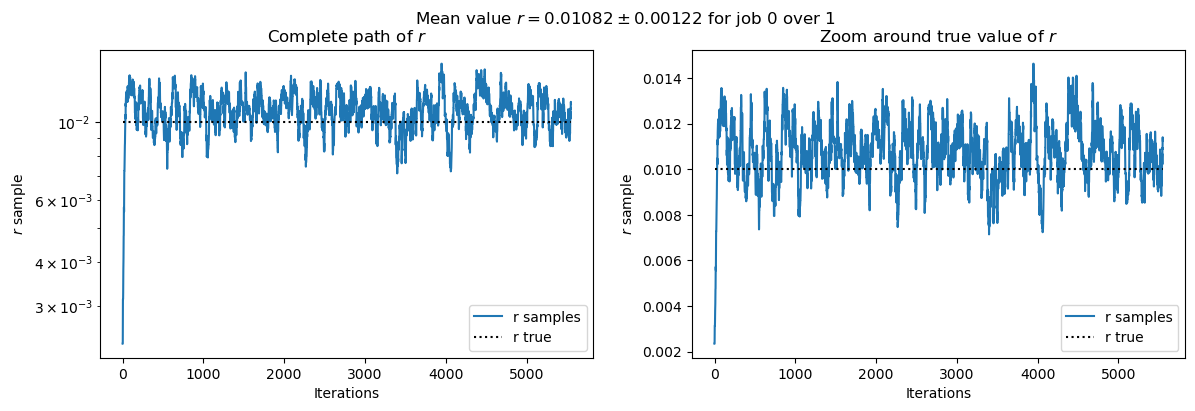

In [70]:
if MICMAC_sampler_obj.sample_r_Metropolis:
    for job in range(num_jobs):
        plt.figure(figsize=(14,4))
        
        # n_sigma = 3
        
        # cond = np.abs((all_r_samples[job] - all_r_samples[job].mean())/(all_r_samples[job].std())) < n_sigma
        cond = np.arange(MICMAC_sampler_obj.number_iterations_sampling+1) > MICMAC_sampler_obj.number_iterations_sampling + 1 - burn_in
        print(all_r_samples[job,cond].shape, MICMAC_sampler_obj.number_iterations_sampling)
        mean_r = np.round(all_r_samples[job,cond].mean(), decimals=5)
        std_r = np.round(all_r_samples[job,cond].std(), decimals=5)

        plt.suptitle(f"Mean value $r = {mean_r} \pm {std_r}$ for job {job} over {num_jobs}")
        plt.subplot(121)
        plt.plot(np.arange(MICMAC_sampler_obj.number_iterations_sampling+1), all_r_samples[job], label='r samples')
        plt.plot([0, MICMAC_sampler_obj.number_iterations_sampling+1], [MICMAC_sampler_obj.r_true,MICMAC_sampler_obj.r_true], 'k:', label='r true')

        plt.yscale('log')
        plt.xlabel("Iterations")
        plt.ylabel('$r$ sample')
        plt.title('Complete path of $r$')
        plt.legend()

        plt.subplot(122)
        plt.plot(np.arange(MICMAC_sampler_obj.number_iterations_sampling+1), all_r_samples[job], label='r samples')
        plt.plot([0, MICMAC_sampler_obj.number_iterations_sampling+1], [MICMAC_sampler_obj.r_true,MICMAC_sampler_obj.r_true], 'k:', label='r true')
        plt.xlabel("Iterations")
        plt.ylabel('$r$ sample')
        plt.title('Zoom around true value of $r$')
        plt.legend()
        # plt.ylim(ymin=MICMAC_sampler_obj.r_true*.7, ymax=MICMAC_sampler_obj.r_true*1.3)
    plt.show()

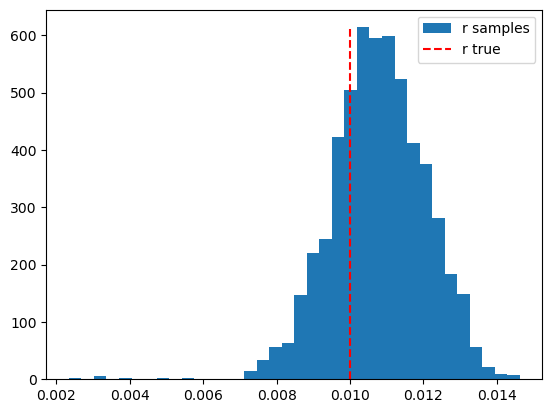

In [71]:
if MICMAC_sampler_obj.sample_r_Metropolis:
    for job in range(num_jobs):
        plt.figure()
        hist_values, bins_value, _ = plt.hist(all_r_samples[job], bins='rice', label='r samples')
        plt.plot([MICMAC_sampler_obj.r_true,MICMAC_sampler_obj.r_true], [0,hist_values.max()], 'r--', label='r true')
        plt.legend()
    plt.show()

In [72]:
number_parameters_B_f_samples = all_params_mixing_matrix_samples.shape[-1]
number_params_B_f_nside0 = (MICMAC_sampler_obj.n_frequencies-len(MICMAC_sampler_obj.pos_special_freqs))*(MICMAC_sampler_obj.n_components-1)

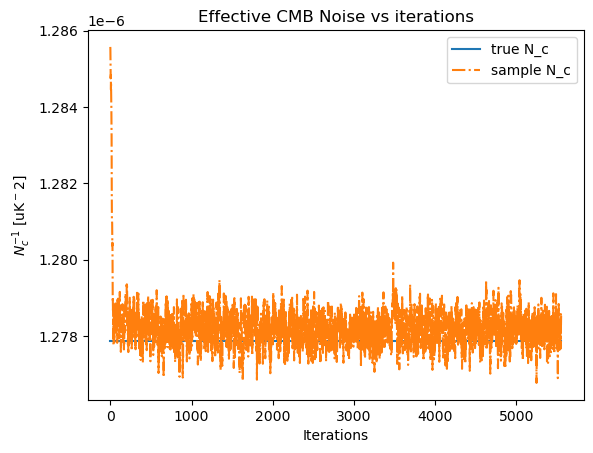

In [73]:
mixing_matrix_obj.update_params(init_params)
mixing_matrix_sampled = mixing_matrix_obj.get_B()
BtinvNB_true = micmac.get_inv_BtinvNB(freq_inverse_noise, mixing_matrix_sampled)

# if number_parameters_B_f_samples == number_params_B_f_nside0:
for job in range(num_jobs):
    all_mixing_matrix = np.zeros((MICMAC_sampler_obj.number_iterations_sampling+1,MICMAC_sampler_obj.n_frequencies,MICMAC_sampler_obj.n_components))

    all_mixing_matrix[:,:,0] = mixing_matrix_sampled[:,0,0]
    all_mixing_matrix[:,0,:] = mixing_matrix_sampled[0,:,0]
    all_mixing_matrix[:,-1,:] = mixing_matrix_sampled[-1,:,0]
    
    cumsum_size_patches = np.zeros(MICMAC_sampler_obj.size_patches.shape[0]+1, dtype=int)
    cumsum_size_patches[1:] = MICMAC_sampler_obj.size_patches.cumsum()
    for i in range((MICMAC_sampler_obj.size_patches.shape[0])):
        all_mixing_matrix[:,i%(MICMAC_sampler_obj.n_frequencies-len(MICMAC_sampler_obj.pos_special_freqs))+1, i//(MICMAC_sampler_obj.n_frequencies-len(MICMAC_sampler_obj.pos_special_freqs))+1] = all_params_mixing_matrix_samples[job,:,cumsum_size_patches[i]:cumsum_size_patches[i+1]].mean(axis=1)


    true_N_c = BtinvNB_true[0,0]
    cl_noise_harm_0 = micmac.get_Cl_noise(np.array(instrument['depth_p']), mixing_matrix_sampled.mean(axis=2), lmax)[0,0,lmin]
    all_inv_N_c = jnp.linalg.pinv(jnp.einsum("ifc,fh,ihd->icd", all_mixing_matrix, MICMAC_sampler_obj.freq_inverse_noise.mean(axis=2), all_mixing_matrix))[:,0,0]*jhp.nside2resol(MICMAC_sampler_obj.nside)**2
    # all_inv_N_c = micmac.get_inv_BtinvNB(MICMAC_sampler_obj.freq_inverse_noise, iteration_mixing_matrix.mean(axis=2))[0,0]
    plt.figure()
    plt.title('Effective CMB Noise vs iterations')
    # plt.plot([0,MICMAC_sampler_obj.number_iterations_sampling+1], [true_N_c,true_N_c], label='true N_c')
    plt.plot([0,MICMAC_sampler_obj.number_iterations_sampling+1], [cl_noise_harm_0,cl_noise_harm_0], label='true N_c')
    plt.plot(np.arange(MICMAC_sampler_obj.number_iterations_sampling+1), all_inv_N_c, '-.', label='sample N_c')

    plt.xlabel('Iterations')
    plt.ylabel('$N_c^{-1}$ [uK$^-2$]')
    # plt.loglog()
    # plt.xscale('log')
    # plt.yscale('log')
    plt.legend()
plt.show()

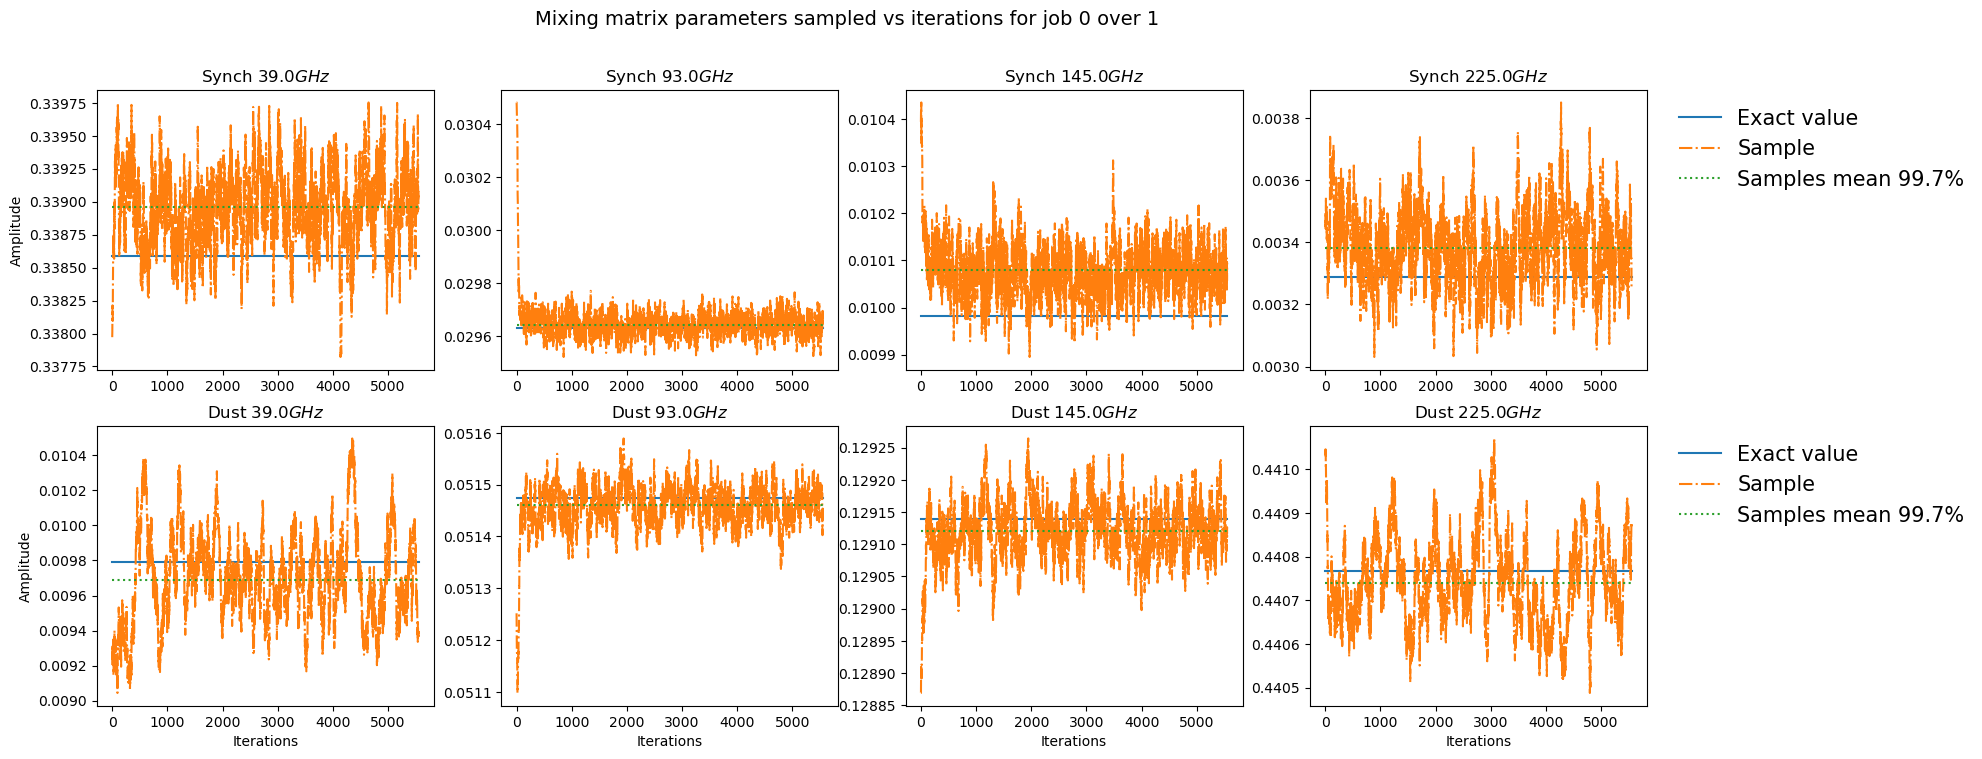

In [74]:
list_correl = ['EE', 'BB', 'EB']

ell_arange = np.arange(red_cov_approx_matrix.shape[0]) + lmin

frequency_Bf = np.array(instrument['frequency'][1:-1])
dim_Bf = frequency_Bf.shape[0]
if number_parameters_B_f_samples == number_params_B_f_nside0:
    for job in range(num_jobs):
        all_B_f_sample_synch = all_params_mixing_matrix_samples[job,:,:dim_Bf]
        all_B_f_sample_dust = all_params_mixing_matrix_samples[job,:,dim_Bf:]

        frequency_array = np.array(instrument['frequency'])


        if MICMAC_sampler_obj.n_frequencies-len_pos_special_freqs < 10:
            plt.figure(figsize=(20,8))
            plt.suptitle('Mixing matrix parameters sampled vs iterations for job {} over {}'.format(job,num_jobs), fontsize=14)
            # plt.subplot(121)

            for i in range(MICMAC_sampler_obj.n_frequencies-len_pos_special_freqs):
                plt.subplot(201+len(frequency_Bf)*10+i)
                plt.title((f'Synch ${frequency_Bf[i]} GHz$'))
                plt.plot([0,MICMAC_sampler_obj.number_iterations_sampling+1], [init_params[i],init_params[i]], label='Exact value')
                plt.plot(np.arange(MICMAC_sampler_obj.number_iterations_sampling+1), all_B_f_sample_synch[:,i], '-.', label='Sample')
                
                n_sigma = 3
                transformed_samples = np.abs(all_B_f_sample_synch[:,i] - all_B_f_sample_synch[:,i].mean())/(all_B_f_sample_synch[:,i].std()) #< n_sigma
                cond = np.exp(transformed_samples**2/2)/(np.sqrt(2*np.pi)) < 0.9973
                mean_B_f = np.round(all_B_f_sample_synch[:,i][cond].mean(), decimals=5)
                std_B_f = np.round(all_B_f_sample_synch[:,i][cond].std(), decimals=5)

                mean_value = all_B_f_sample_synch[:,i].mean()
                plt.plot([0,MICMAC_sampler_obj.number_iterations_sampling+1], [mean_B_f,mean_B_f], ':', label='Samples mean 99.7%')

                # plt.yscale('log')
                # plt.xlabel('Iterations')
                if i == 0:
                    plt.ylabel('Amplitude')
            plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", prop={'size': 15}, frameon=False)
            # plt.loglog()

            # plt.figure(figsize=(20,8))
            # plt.subplot(122)
            for i in range(MICMAC_sampler_obj.n_frequencies-len_pos_special_freqs):
                plt.subplot(201+len(frequency_Bf)*10+i+len(frequency_Bf))
                # plt.subplot(201+len(frequency_Bf)*10+i)
                plt.title((f'Dust ${frequency_Bf[i]} GHz$'))
                plt.plot([0,MICMAC_sampler_obj.number_iterations_sampling+1], [init_params[i+dim_Bf],init_params[i+dim_Bf]], label='Exact value')
                plt.plot(np.arange(MICMAC_sampler_obj.number_iterations_sampling+1), all_B_f_sample_dust[:,i], '-.', label='Sample')

                n_sigma = 3
                transformed_samples = np.abs(all_B_f_sample_dust[:,i] - all_B_f_sample_dust[:,i].mean())/(all_B_f_sample_dust[:,i].std()) #< n_sigma
                cond = np.exp(transformed_samples**2/2)/(np.sqrt(2*np.pi)) < 0.9973
                mean_B_f = np.round(all_B_f_sample_dust[:,i][cond].mean(), decimals=5)
                std_B_f = np.round(all_B_f_sample_dust[:,i][cond].std(), decimals=5)

                mean_value = all_B_f_sample_dust[:,i].mean()
                plt.plot([0,MICMAC_sampler_obj.number_iterations_sampling+1], [mean_B_f,mean_B_f], ':', label='Samples mean 99.7%')
                # plt.yscale('log')
                plt.xlabel('Iterations')
                if i == 0:
                    plt.ylabel('Amplitude')
            plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", prop={'size': 15}, frameon=False)
            # plt.loglog()
            

        plt.show()

In [75]:
list_correl = ['EE', 'BB', 'EB']

ell_arange = np.arange(red_cov_approx_matrix.shape[0]) + lmin

frequency_Bf = np.array(instrument['frequency'][1:-1])
dim_Bf = frequency_Bf.shape[0]

alpha_value = .4

if number_parameters_B_f_samples != number_params_B_f_nside0:
    for job in range(num_jobs):
        number_params_synch = MICMAC_sampler_obj.indexes_b[0,1]
        all_B_f_sample_synch = all_params_mixing_matrix_samples[job,:,:number_params_synch]
        all_B_f_sample_dust = all_params_mixing_matrix_samples[job,:,number_params_synch:]

        frequency_array = np.array(instrument['frequency'])


        if MICMAC_sampler_obj.n_frequencies-len_pos_special_freqs < 10:
            plt.figure(figsize=(20,8))
            plt.suptitle('Mixing matrix parameters sampled vs iterations for job {} over {}'.format(job,num_jobs), fontsize=14)
            # plt.subplot(121)

            for i in range(MICMAC_sampler_obj.n_frequencies-len_pos_special_freqs):
                plt.subplot(201+len(frequency_Bf)*10+i)
                plt.title((f'Synch ${frequency_Bf[i]} GHz$'))
                
                plt.plot([0,MICMAC_sampler_obj.number_iterations_sampling+1], [init_params[MICMAC_sampler_obj.indexes_b[i,0]],init_params[MICMAC_sampler_obj.indexes_b[i,0]]], label='Exact value', color='tab:blue')
                plt.plot(np.arange(MICMAC_sampler_obj.number_iterations_sampling+1), all_B_f_sample_synch[:,MICMAC_sampler_obj.indexes_b[i,0]], '-.', color='tab:orange', label='Sample', alpha=alpha_value)
                
                for j in range(1,MICMAC_sampler_obj.size_patches[i]):
                    plt.plot([0,MICMAC_sampler_obj.number_iterations_sampling+1], [init_params[MICMAC_sampler_obj.indexes_b[i,0]+j],init_params[MICMAC_sampler_obj.indexes_b[i,0]+j]], color='tab:blue')
                    plt.plot(np.arange(MICMAC_sampler_obj.number_iterations_sampling+1), all_B_f_sample_synch[:,MICMAC_sampler_obj.indexes_b[i,0]+j], '-.', color='tab:orange', alpha=alpha_value)
                

                if i == 0:
                    plt.ylabel('Amplitude')
            plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", prop={'size': 15}, frameon=False)
            # plt.loglog()

            # plt.figure(figsize=(20,8))
            # plt.subplot(122)
            for i in range(MICMAC_sampler_obj.n_frequencies-len_pos_special_freqs):
                plt.subplot(201+len(frequency_Bf)*10+i+len(frequency_Bf))
                # plt.subplot(201+len(frequency_Bf)*10+i)
                plt.title((f'Dust ${frequency_Bf[i]} GHz$'))
                # plt.plot([0,MICMAC_sampler_obj.number_iterations_sampling+1], [init_params[i+dim_Bf],init_params[i+dim_Bf]], label='Exact value')
                # plt.plot(np.arange(MICMAC_sampler_obj.number_iterations_sampling+1), all_B_f_sample_dust[:,i], '-.', label='Sample')

                plt.plot([0,MICMAC_sampler_obj.number_iterations_sampling+1], [init_params[MICMAC_sampler_obj.indexes_b[i,1]],init_params[MICMAC_sampler_obj.indexes_b[i,1]]], label='Exact value', color='tab:blue')
                plt.plot(np.arange(MICMAC_sampler_obj.number_iterations_sampling+1), all_params_mixing_matrix_samples[job,:,MICMAC_sampler_obj.indexes_b[i,1]], '-.', color='tab:orange', label='Sample', alpha=alpha_value)
                
                for j in range(1,MICMAC_sampler_obj.size_patches[i+number_params_synch]):
                    plt.plot([0,MICMAC_sampler_obj.number_iterations_sampling+1], [init_params[MICMAC_sampler_obj.indexes_b[i,1]+j],init_params[MICMAC_sampler_obj.indexes_b[i,1]+j]], color='tab:blue')
                    plt.plot(np.arange(MICMAC_sampler_obj.number_iterations_sampling+1), all_params_mixing_matrix_samples[job,:,MICMAC_sampler_obj.indexes_b[i,1]+j], '-.', color='tab:orange', alpha=alpha_value)

                # n_sigma = 3
                # transformed_samples = np.abs(all_B_f_sample_dust[:,i] - all_B_f_sample_dust[:,i].mean())/(all_B_f_sample_dust[:,i].std()) #< n_sigma
                # cond = np.exp(transformed_samples**2/2)/(np.sqrt(2*np.pi)) < 0.9973
                # mean_B_f = np.round(all_B_f_sample_dust[:,i][cond].mean(), decimals=5)
                # std_B_f = np.round(all_B_f_sample_dust[:,i][cond].std(), decimals=5)

                # mean_value = all_B_f_sample_dust[:,i].mean()
                # plt.plot([0,MICMAC_sampler_obj.number_iterations_sampling+1], [mean_B_f,mean_B_f], ':', label='Samples mean 99.7%')
                # plt.yscale('log')
                plt.xlabel('Iterations')
                if i == 0:
                    plt.ylabel('Amplitude')
            plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", prop={'size': 15}, frameon=False)
            # plt.loglog()
            

        plt.show()

In [76]:
all_params_mixing_matrix_samples.shape

(1, 5551, 8)

In [77]:
mixing_matrix_obj.update_params(all_params_mixing_matrix_samples[0,-1], jax_use=True)
test_mixing_matrix = mixing_matrix_obj.get_B(jax_use=True)

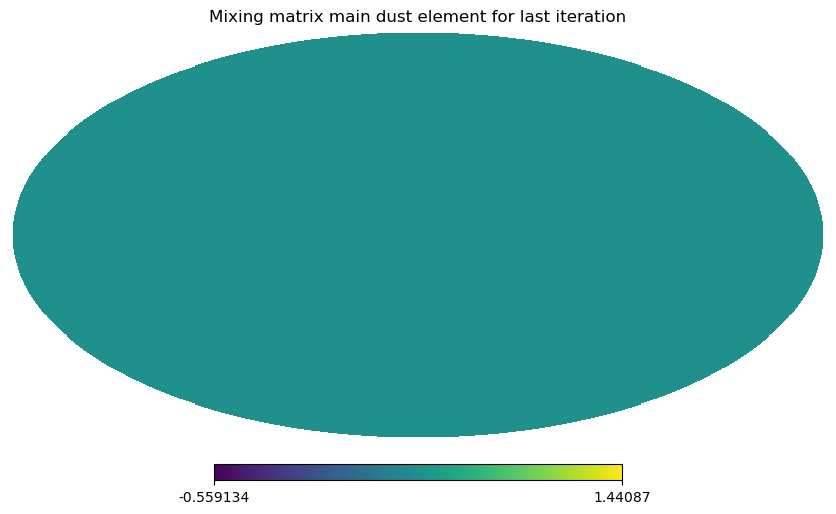

In [78]:
hp.mollview(test_mixing_matrix[4,2], title="Mixing matrix main dust element for last iteration")

In [79]:
# all_params_mixing_matrix_samples[0,:,12:24].std(axis=0)
for i in range(8):
    print(all_params_mixing_matrix_samples[0,:,12*i:(i+1)*12].std(axis=0))

[3.00022779e-04 6.40381866e-05 5.79382530e-05 1.22172377e-04
 2.57946243e-04 4.57202984e-05 4.65907454e-05 9.91013804e-05]
[]
[]
[]
[]
[]
[]
[]


In [80]:
all_params_mixing_matrix_samples[0,-1]

array([0.33893287, 0.02967593, 0.01009527, 0.00325825, 0.00939304,
       0.05144383, 0.12911854, 0.44086551])

In [81]:
mixing_matrix_obj.update_params(init_params)
mixing_matrix_obj.params

Array([0.33858815, 0.02963068, 0.00998213, 0.00328725, 0.00979233,
       0.05147511, 0.12913911, 0.44076761], dtype=float64)

In [82]:
list_correl = ['EE', 'BB', 'EB']

ell_arange = np.arange(red_cov_approx_matrix.shape[0]) + lmin

frequency_Bf = np.array(instrument['frequency'][1:-1])
dim_Bf = frequency_Bf.shape[0]

for job in range(num_jobs):
    all_B_f_sample_synch = all_params_mixing_matrix_samples[job,:,:dim_Bf]
    all_B_f_sample_dust = all_params_mixing_matrix_samples[job,:,dim_Bf:]

    frequency_array = np.array(instrument['frequency'])


    if MICMAC_sampler_obj.n_frequencies-len_pos_special_freqs >= 10:
        n_columns = 4
        number_rows = (MICMAC_sampler_obj.n_frequencies-len_pos_special_freqs)//n_columns + 1

        # plt.figure(figsize=(20,8))
        fig, ax = plt.subplots(number_rows, n_columns, figsize=(20,8))
        useless_plots = number_rows*n_columns - (MICMAC_sampler_obj.n_frequencies-len_pos_special_freqs)
        for idx_useless in range(0,useless_plots):
            num_row = (number_rows*n_columns)//n_columns
            num_col = (number_rows*n_columns)%n_columns
            fig.delaxes(ax[num_row-1, num_col-idx_useless-1])

        fig.suptitle(f"Mixing matrix synch parameters sampled vs iterations for job {job} over {num_jobs}", fontsize=14)
        # plt.subplot(121)

        for i in range(MICMAC_sampler_obj.n_frequencies-len_pos_special_freqs):
            # plt.subplot(201+len(frequency_Bf)*10+i)
            num_row = i//n_columns
            num_col = i%n_columns
            ax[num_row, num_col].set_title((f'Synch ${frequency_Bf[i]} GHz$'))
            # plt.title((f'Synch ${frequency_Bf[i]} GHz$'))
            
            ax[num_row, num_col].plot([0,MICMAC_sampler_obj.number_iterations_sampling+1], [init_params[i],init_params[i]], label='Exact value')
            ax[num_row, num_col].plot(np.arange(MICMAC_sampler_obj.number_iterations_sampling+1), all_B_f_sample_synch[:,i], '-.', label='Sample')
            
            n_sigma = 3
            transformed_samples = np.abs(all_B_f_sample_synch[:,i] - all_B_f_sample_synch[:,i].mean())/(all_B_f_sample_synch[:,i].std()) #< n_sigma
            cond = np.exp(transformed_samples**2/2)/(np.sqrt(2*np.pi)) < 0.9973
            mean_B_f = np.round(all_B_f_sample_synch[:,i][cond].mean(), decimals=5)
            std_B_f = np.round(all_B_f_sample_synch[:,i][cond].std(), decimals=5)

            mean_value = all_B_f_sample_synch[:,i].mean()
            ax[num_row, num_col].plot([0,MICMAC_sampler_obj.number_iterations_sampling+1], [mean_B_f,mean_B_f], ':', label='Samples mean 99.7%')

            # plt.yscale('log')
            # plt.xlabel('Iterations')
            ax[num_row, num_col].set_xlabel('Iterations')
            if i == 0:
                # plt.ylabel('Amplitude')
                ax[num_row, num_col].set_ylabel('Amplitude')
            if i >= MICMAC_sampler_obj.n_frequencies-len_pos_special_freqs-n_columns:
                ax[num_row, num_col].set_xlabel('Iterations')
            else:
                ax[num_row, num_col].tick_params(axis='x', labelbottom=False)
        ax[num_row, num_col].legend(bbox_to_anchor=(1.04, 1), loc="upper left", prop={'size': 15}, frameon=False)
        # plt.loglog()

        # plt.figure(figsize=(20,8))
        # plt.subplot(122)
        fig, ax = plt.subplots(number_rows, n_columns, figsize=(20,8))
        useless_plots = number_rows*n_columns - (MICMAC_sampler_obj.n_frequencies-len_pos_special_freqs)
        for idx_useless in range(0,useless_plots):
            num_row = (number_rows*n_columns)//n_columns
            num_col = (number_rows*n_columns)%n_columns
            fig.delaxes(ax[num_row-1, num_col-idx_useless-1])


        fig.suptitle(f"Mixing matrix dust parameters sampled vs iterations for job {job} over {num_jobs}", fontsize=14)
        
        for i in range(MICMAC_sampler_obj.n_frequencies-len_pos_special_freqs):
            # plt.subplot(201+len(frequency_Bf)*10+i+len(frequency_Bf))
            # plt.subplot(201+len(frequency_Bf)*10+i)
            num_row = i//n_columns
            num_col = i%n_columns
            ax[num_row, num_col].set_title((f'Dust ${frequency_Bf[i]} GHz$'))
            ax[num_row, num_col].plot([0,MICMAC_sampler_obj.number_iterations_sampling+1], [init_params[i+dim_Bf],init_params[i+dim_Bf]], label='Exact value')
            ax[num_row, num_col].plot(np.arange(MICMAC_sampler_obj.number_iterations_sampling+1), all_B_f_sample_dust[:,i], '-.', label='Sample')

            n_sigma = 3
            transformed_samples = np.abs(all_B_f_sample_dust[:,i] - all_B_f_sample_dust[:,i].mean())/(all_B_f_sample_dust[:,i].std()) #< n_sigma
            cond = np.exp(transformed_samples**2/2)/(np.sqrt(2*np.pi)) < 0.9973
            mean_B_f = np.round(all_B_f_sample_dust[:,i][cond].mean(), decimals=5)
            std_B_f = np.round(all_B_f_sample_dust[:,i][cond].std(), decimals=5)

            mean_value = all_B_f_sample_dust[:,i].mean()
            ax[num_row, num_col].plot([0,MICMAC_sampler_obj.number_iterations_sampling+1], [mean_B_f,mean_B_f], ':', label='Samples mean 99.7%')
            # plt.yscale('log')
            
            if i == 0:
                ax[num_row, num_col].set_ylabel('Amplitude')
            if i >= MICMAC_sampler_obj.n_frequencies-len_pos_special_freqs-n_columns:
                ax[num_row, num_col].set_xlabel('Iterations')
            else:
                ax[num_row, num_col].tick_params(axis='x', labelbottom=False)
        ax[num_row, num_col].legend(bbox_to_anchor=(1.04, 1), loc="upper left", prop={'size': 15}, frameon=False)
        # plt.loglog()

    plt.show()

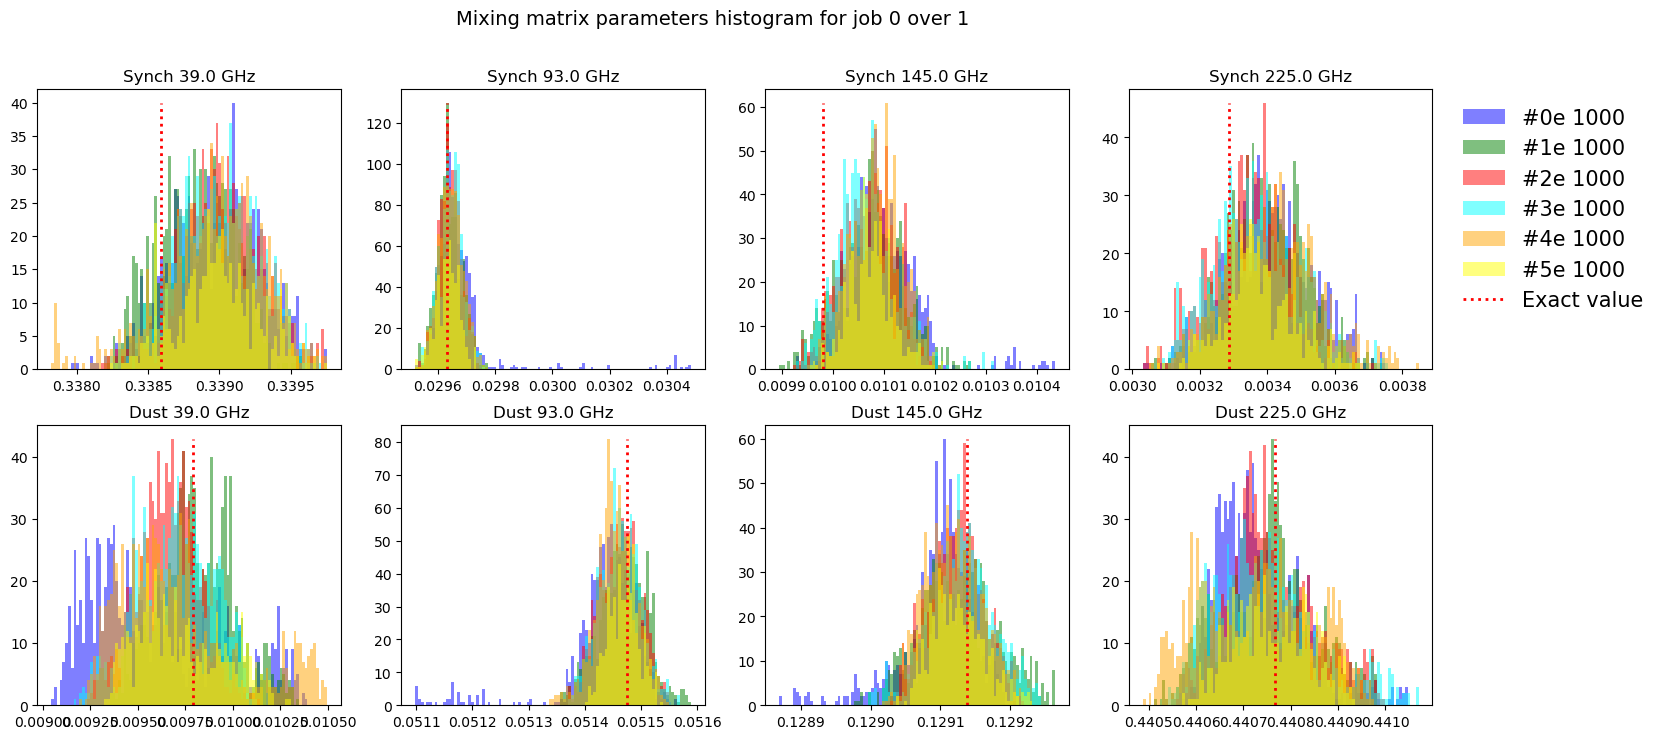

In [83]:
list_correl = ['EE', 'BB', 'EB']

ell_arange = np.arange(red_cov_approx_matrix.shape[0]) + lmin

frequency_Bf = np.array(instrument['frequency'][1:-1])
frequency_array = np.array(instrument['frequency'])

num_iter_1000 = MICMAC_sampler_obj.number_iterations_sampling//1000
if MICMAC_sampler_obj.number_iterations_sampling%1000 != 0:
    num_iter_1000 += 1

color_list = ['blue', 'green', 'red', 'cyan', 'orange', 'yellow', 'purple', 'pink', 'brown', 'black', 
            'gray', 'olive', 'lime', 'teal', 'magenta', 'salmon', 'darkgreen', 'darkblue', 'darkred', 
            'darkcyan', 'darkorange', 'darkyellow', 'darkpurple', 'darkpink', 'darkbrown', 'darkgray', 'darkolive', 'darklime', 'darkteal', 'darkmagenta', 'darksalmon', 'lightgreen', 'lightblue', 'lightred', 'lightcyan', 'lightorange', 'lightyellow', 'lightpurple', 'lightpink', 'lightbrown', 'lightgray', 'lightolive', 'lightlime', 'lightteal', 'lightmagenta', 'lightsalmon', 'darkgreen', 'darkblue', 'darkred']
if MICMAC_sampler_obj.len_params == (MICMAC_sampler_obj.n_components - 1)*len(frequency_Bf):
    for job in range(num_jobs):
        if MICMAC_sampler_obj.n_frequencies-len_pos_special_freqs < 10:
            all_params_mixing_matrix_samples_job = all_params_mixing_matrix_samples[job]
            plt.figure(figsize=(18,8))
            plt.suptitle(f"Mixing matrix parameters histogram for job {job} over {num_jobs}", fontsize=14)

            for i in range(len(frequency_Bf)):
                plt.subplot(201+len(frequency_Bf)*10+i)
                plt.title((f'Synch {frequency_Bf[i]} GHz'))
                if all_params_mixing_matrix_samples_job[:,i].min() == all_params_mixing_matrix_samples_job[:,i].max():
                    min_value = all_params_mixing_matrix_samples_job[:,i].min()*.9
                    max_value = all_params_mixing_matrix_samples_job[:,i].max()*1.1
                else:
                    min_value = all_params_mixing_matrix_samples_job[:,i].min()
                    max_value = all_params_mixing_matrix_samples_job[:,i].max()
                bins_array = np.linspace(min_value, max_value, 100) #MICMAC_sampler_obj.number_iterations_sampling//200

                max_height = 0
                for j in range(num_iter_1000):
                    heights, _, _ = plt.hist(all_params_mixing_matrix_samples_job[j*1000:(j+1)*1000,i], bins=bins_array, color=color_list[j], alpha=.5, label=f'#{j}e {1000}')
                    max_height = max(max_height, heights.max())
                # plt.plot([init_params[i,0],init_params[i,0]], [0,max_height], 'r:', linewidth=2.0, label=f'$B^s {frequency_Bf[i]} GHz$')
                plt.plot([init_params[i],init_params[i]], [0,max_height], 'r:', linewidth=2.0, label='Exact value')
            plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", prop={'size': 15}, frameon=False)


            for i in range(len(frequency_Bf)):
                plt.subplot(201+len(frequency_Bf)*10+i+len(frequency_Bf))
                plt.title((f'Dust {frequency_Bf[i]} GHz'))
                if all_params_mixing_matrix_samples_job[:,i+dim_Bf].min() == all_params_mixing_matrix_samples_job[:,i+dim_Bf].max():
                    min_value = all_params_mixing_matrix_samples_job[:,i+dim_Bf].min()*.9
                    max_value = all_params_mixing_matrix_samples_job[:,i+dim_Bf].max()*1.1
                else:
                    min_value = all_params_mixing_matrix_samples_job[:,i+dim_Bf].min()
                    max_value = all_params_mixing_matrix_samples_job[:,i+dim_Bf].max()
                bins_array = np.linspace(min_value, max_value, 100) #MICMAC_sampler_obj.number_iterations_sampling//200

                max_height = 0
                for j in range(num_iter_1000):
                    heights, _, _ = plt.hist(all_params_mixing_matrix_samples_job[j*1000:(j+1)*1000,i+dim_Bf], bins=bins_array, color=color_list[j], alpha=.5, label=f'#{j}e {1000}')
                    max_height = max(max_height, heights.max())

                # plt.plot([init_params[i,1],init_params[i,1]], [0,max_height], 'r:', linewidth=2.0, label=f'$B^d {frequency_Bf[i]} GHz$')
                plt.plot([init_params[i+dim_Bf],init_params[i+dim_Bf]], [0,max_height], 'r:', linewidth=2.0, label='Exact value')
            # plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", prop={'size': 15}, frameon=False)

        plt.show()


In [84]:
list_correl = ['EE', 'BB', 'EB']

ell_arange = np.arange(red_cov_approx_matrix.shape[0]) + lmin

frequency_Bf = np.array(instrument['frequency'][1:-1])
frequency_array = np.array(instrument['frequency'])

idx_patches = np.zeros((MICMAC_sampler_obj.n_frequencies-len_pos_special_freqs)*(MICMAC_sampler_obj.n_components - 1)+1)
idx_patches[:-1] = MICMAC_sampler_obj.indexes_b.ravel(order='F')
idx_patches[-1] = idx_patches[:-1].max() + MICMAC_sampler_obj.size_patches[-1]

num_iter_1000 = MICMAC_sampler_obj.number_iterations_sampling//1000
if MICMAC_sampler_obj.number_iterations_sampling%1000 != 0:
    num_iter_1000 += 1

alpha_value = .4

color_list = ['blue', 'green', 'red', 'cyan', 'orange', 'yellow', 'purple', 'pink', 'brown', 'black', 
            'gray', 'olive', 'lime', 'teal', 'magenta', 'salmon', 'darkgreen', 'darkblue', 'darkred', 
            'darkcyan', 'darkorange', 'darkyellow', 'darkpurple', 'darkpink', 'darkbrown', 'darkgray', 'darkolive', 'darklime', 'darkteal', 'darkmagenta', 'darksalmon', 'lightgreen', 'lightblue', 'lightred', 'lightcyan', 'lightorange', 'lightyellow', 'lightpurple', 'lightpink', 'lightbrown', 'lightgray', 'lightolive', 'lightlime', 'lightteal', 'lightmagenta', 'lightsalmon', 'darkgreen', 'darkblue', 'darkred']
if MICMAC_sampler_obj.max_len_patches_Bf < 1000:
    if MICMAC_sampler_obj.len_params != (MICMAC_sampler_obj.n_components - 1)*len(frequency_Bf):
        for job in range(num_jobs):
            if MICMAC_sampler_obj.n_frequencies-len_pos_special_freqs < 10:
                
                plt.figure(figsize=(18,8))
                plt.suptitle(f"Mixing matrix parameters histogram for job {job} over {num_jobs}", fontsize=14)

                for i in range(len(frequency_Bf)):
                    idx_patch = np.arange(idx_patches[i],idx_patches[i+1], dtype=int)
                    all_params_mixing_matrix_samples_job = all_params_mixing_matrix_samples[job,:,idx_patch].T
                    plt.subplot(201+len(frequency_Bf)*10+i)
                    plt.title((f'Synch {frequency_Bf[i]} GHz'))
                    if all_params_mixing_matrix_samples_job.min() == all_params_mixing_matrix_samples_job.max():
                        min_value = all_params_mixing_matrix_samples_job.min()*.9
                        max_value = all_params_mixing_matrix_samples_job.max()*1.1
                    else:
                        min_value = all_params_mixing_matrix_samples_job.min()
                        max_value = all_params_mixing_matrix_samples_job.max()
                    bins_array = np.linspace(min_value, max_value, 100) #MICMAC_sampler_obj.number_iterations_sampling//200

                    max_height = 0
                    for j in range(num_iter_1000):
                        heights, _, _ = plt.hist(all_params_mixing_matrix_samples_job[j*1000:(j+1)*1000,0], bins=bins_array, color=color_list[j], alpha=alpha_value, label=f'#{j}e {1000}')
                        max_height = max(max_height, heights.max())
                        for k in range(1,len(idx_patch)):
                            heights, _, _ = plt.hist(all_params_mixing_matrix_samples_job[j*1000:(j+1)*1000,k], bins=bins_array, color=color_list[j], alpha=alpha_value)
                            max_height = max(max_height, heights.max())
                        plt.plot([init_params[idx_patch][0],init_params[idx_patch][0]], [0,max_height], 'r:', linewidth=2.0, label='Exact value')
                        for k in range(1,len(idx_patch)):
                            plt.plot([init_params[idx_patch][k],init_params[idx_patch][k]], [0,max_height], 'r:', linewidth=2.0)
                    # plt.plot([init_params[i,0],init_params[i,0]], [0,max_height], 'r:', linewidth=2.0, label=f'$B^s {frequency_Bf[i]} GHz$')
                    
                plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", prop={'size': 15}, frameon=False)


                for i in range(len(frequency_Bf)):
                    plt.subplot(201+len(frequency_Bf)*10+i+len(frequency_Bf))
                    plt.title((f'Dust {frequency_Bf[i]} GHz'))

                    idx_patch = np.arange(idx_patches[i+dim_Bf],idx_patches[i+1+dim_Bf], dtype=int)
                    dim_dust = MICMAC_sampler_obj.indexes_b[0,1]
                    all_params_mixing_matrix_samples_job = all_params_mixing_matrix_samples[job,:,idx_patch].T
                    if all_params_mixing_matrix_samples_job.min() == all_params_mixing_matrix_samples_job.max():
                        min_value = all_params_mixing_matrix_samples_job.min()*.9
                        max_value = all_params_mixing_matrix_samples_job.max()*1.1
                    else:
                        min_value = all_params_mixing_matrix_samples_job.min()
                        max_value = all_params_mixing_matrix_samples_job.max()
                    bins_array = np.linspace(min_value, max_value, 100) #MICMAC_sampler_obj.number_iterations_sampling//200

                    # max_height = 0
                    # for j in range(num_iter_1000):
                    #     heights, _, _ = plt.hist(all_params_mixing_matrix_samples_job[j*1000:(j+1)*1000,i+dim_Bf], bins=bins_array, color=color_list[j], alpha=.3, label=f'#{j}e {1000}')
                    #     max_height = max(max_height, heights.max())
                    max_height = 0
                    for j in range(num_iter_1000):
                        heights, _, _ = plt.hist(all_params_mixing_matrix_samples_job[j*1000:(j+1)*1000,0], bins=bins_array, color=color_list[j], alpha=alpha_value, label=f'#{j}e {1000}')
                        max_height = max(max_height, heights.max())
                        for k in range(1,len(idx_patch)):
                            heights, _, _ = plt.hist(all_params_mixing_matrix_samples_job[j*1000:(j+1)*1000,k], bins=bins_array, color=color_list[j], alpha=alpha_value)
                            max_height = max(max_height, heights.max())
                        # max_height = 1
                        plt.plot([init_params[idx_patch][0],init_params[idx_patch][0]], [0,max_height], 'r:', linewidth=2.0, label='Exact value')
                        for k in range(1,len(idx_patch)):
                            plt.plot([init_params[idx_patch][k],init_params[idx_patch][k]], [0,max_height], 'r:', linewidth=2.0)

                    # plt.plot([init_params[i,1],init_params[i,1]], [0,max_height], 'r:', linewidth=2.0, label=f'$B^d {frequency_Bf[i]} GHz$')
                    # plt.plot([init_params[i+dim_Bf],init_params[i+dim_Bf]], [0,max_height], 'r:', linewidth=2.0, label='Exact value')
                # plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", prop={'size': 15}, frameon=False)

            plt.show()


In [85]:
list_correl = ['EE', 'BB', 'EB']

ell_arange = np.arange(red_cov_approx_matrix.shape[0]) + lmin

frequency_Bf = np.array(instrument['frequency'][1:-1])
frequency_array = np.array(instrument['frequency'])

num_iter_1000 = MICMAC_sampler_obj.number_iterations_sampling//1000
if MICMAC_sampler_obj.number_iterations_sampling%1000 != 0:
    num_iter_1000 += 1

color_list = ['blue', 'green', 'red', 'cyan', 'orange', 'yellow', 'purple', 'pink', 'brown', 'black', 
            'gray', 'olive', 'lime', 'teal', 'magenta', 'salmon', 'darkgreen', 'darkblue', 'darkred', 
            'darkcyan', 'darkorange', 'darkyellow', 'darkpurple', 'darkpink', 'darkbrown', 'darkgray', 'darkolive', 'darklime', 'darkteal', 'darkmagenta', 'darksalmon', 'lightgreen', 'lightblue', 'lightred', 'lightcyan', 'lightorange', 'lightyellow', 'lightpurple', 'lightpink', 'lightbrown', 'lightgray', 'lightolive', 'lightlime', 'lightteal', 'lightmagenta', 'lightsalmon', 'darkgreen', 'darkblue', 'darkred']
if MICMAC_sampler_obj.max_len_patches_Bf < 1000:
    for job in range(num_jobs):
        if MICMAC_sampler_obj.n_frequencies-len_pos_special_freqs >= 10:
            all_params_mixing_matrix_samples_job = all_params_mixing_matrix_samples[job]
            # plt.figure(figsize=(18,8))
            fig, ax = plt.subplots(number_rows, n_columns, figsize=(20,8))
            fig.suptitle(f"Synch mixing matrix parameters histogram for job {job} over {num_jobs}", fontsize=14)
            useless_plots = number_rows*n_columns - (MICMAC_sampler_obj.n_frequencies-len_pos_special_freqs)
            for idx_useless in range(0,useless_plots):
                num_row = (number_rows*n_columns)//n_columns
                num_col = (number_rows*n_columns)%n_columns
                fig.delaxes(ax[num_row-1, num_col-idx_useless-1])
                

            for i in range(len(frequency_Bf)):
                num_row = i//n_columns
                num_col = i%n_columns
            
                # plt.subplot(201+len(frequency_Bf)*10+i)
                ax[num_row, num_col].set_title((f'Synch {frequency_Bf[i]} GHz'))
                # plt.title((f'Synch {frequency_Bf[i]} GHz'))
                if all_params_mixing_matrix_samples_job[:,i].min() == all_params_mixing_matrix_samples_job[:,i].max():
                    min_value = all_params_mixing_matrix_samples_job[:,i].min()*.9
                    max_value = all_params_mixing_matrix_samples_job[:,i].max()*1.1
                else:
                    min_value = all_params_mixing_matrix_samples_job[:,i].min()
                    max_value = all_params_mixing_matrix_samples_job[:,i].max()
                bins_array = np.linspace(min_value, max_value, 100) #MICMAC_sampler_obj.number_iterations_sampling//200

                max_height = 0
                for j in range(num_iter_1000):
                    heights, _, _ = ax[num_row, num_col].hist(all_params_mixing_matrix_samples_job[j*1000:(j+1)*1000,i], bins=bins_array, color=color_list[j], alpha=.5, label=f'#{j}e {1000}')
                    max_height = max(max_height, heights.max())
                # plt.plot([init_params[i,0],init_params[i,0]], [0,max_height], 'r:', linewidth=2.0, label=f'$B^s {frequency_Bf[i]} GHz$')
                ax[num_row, num_col].plot([init_params[i],init_params[i]], [0,max_height], 'r:', linewidth=2.0, label='Exact value')
            ax[num_row, num_col].legend(bbox_to_anchor=(1.04, 1), loc="upper left", prop={'size': 15}, frameon=False)


            fig, ax = plt.subplots(number_rows, n_columns, figsize=(20,8))
            fig.suptitle(f"Dust mixing matrix parameters histogram for job {job} over {num_jobs}", fontsize=14)
            useless_plots = number_rows*n_columns - (MICMAC_sampler_obj.n_frequencies-len_pos_special_freqs)
            for idx_useless in range(0,useless_plots):
                num_row = (number_rows*n_columns)//n_columns
                num_col = (number_rows*n_columns)%n_columns
                fig.delaxes(ax[num_row-1, num_col-idx_useless-1])

            for i in range(len(frequency_Bf)):
                num_row = i//n_columns
                num_col = i%n_columns
                # plt.subplot(201+len(frequency_Bf)*10+i+len(frequency_Bf))
                ax[num_row, num_col].set_title((f'Dust {frequency_Bf[i]} GHz'))
                if all_params_mixing_matrix_samples_job[:,i+dim_Bf].min() == all_params_mixing_matrix_samples_job[:,i+dim_Bf].max():
                    min_value = all_params_mixing_matrix_samples_job[:,i+dim_Bf].min()*.9
                    max_value = all_params_mixing_matrix_samples_job[:,i+dim_Bf].max()*1.1
                else:
                    min_value = all_params_mixing_matrix_samples_job[:,i+dim_Bf].min()
                    max_value = all_params_mixing_matrix_samples_job[:,i+dim_Bf].max()
                bins_array = np.linspace(min_value, max_value, 100) #MICMAC_sampler_obj.number_iterations_sampling//200

                max_height = 0
                for j in range(num_iter_1000):
                    heights, _, _ = ax[num_row, num_col].hist(all_params_mixing_matrix_samples_job[j*1000:(j+1)*1000,i+dim_Bf], bins=bins_array, color=color_list[j], alpha=.5, label=f'#{j}e {1000}')
                    max_height = max(max_height, heights.max())

                # plt.plot([init_params[i,1],init_params[i,1]], [0,max_height], 'r:', linewidth=2.0, label=f'$B^d {frequency_Bf[i]} GHz$')
                ax[num_row, num_col].plot([init_params[i+dim_Bf],init_params[i+dim_Bf]], [0,max_height], 'r:', linewidth=2.0, label='Exact value')
            ax[num_row, num_col].legend(bbox_to_anchor=(1.04, 1), loc="upper left", prop={'size': 15}, frameon=False)
            # plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", prop={'size': 15}, frameon=False)

        plt.show()


In [86]:
cond = MICMAC_sampler_obj.number_iterations_sampling > 1500

/Users/mag/miniconda3/envs/non_param_silver/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  fig.canvas.print_figure(bytes_io, **kw)


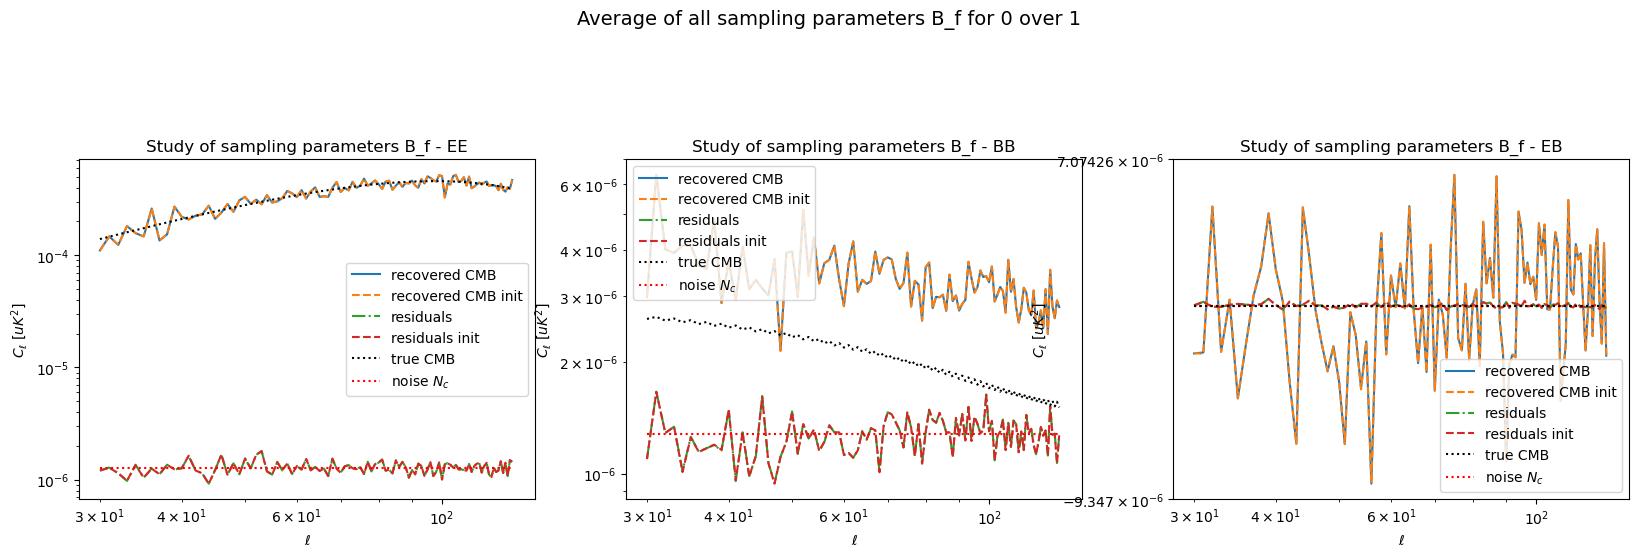

In [87]:
# Residuals power spectrum
for job in range(num_jobs):
    final_params = all_params_mixing_matrix_samples[job,-1]
    final_params = all_params_mixing_matrix_samples[job].mean(axis=0)
    # final_params = all_params_mixing_matrix_samples[job,1000:].mean(axis=0)
    final_params = all_params_mixing_matrix_samples[job,-1000:].mean(axis=0)
    # final_params = all_params_mixing_matrix_samples[job,cond].mean(axis=0)
    # final_params = all_params_mixing_matrix_samples[job,0]
    # final_params = all_params_mixing_matrix_samples[job,:1000].mean(axis=0)
    # final_params = all_params_mixing_matrix_samples[job,1000]
    # final_params = all_params_mixing_matrix_samples[job,:num_sample_AM].mean(axis=0)
    # final_params = all_params_mixing_matrix_samples[job,num_sample_AM:].mean(axis=0)
    # final_params = all_params_mixing_matrix_samples[job,2000:].mean(axis=0)

    c_ell_true_CMB = micmac.get_c_ells_from_red_covariance_matrix(theoretical_red_cov_r0_total + MICMAC_sampler_obj.r_true*theoretical_red_cov_r1_tensor)
    mixing_matrix_obj.update_params(final_params)
    final_mixing_matrix = mixing_matrix_obj.get_B()

    _cl_noise_harm = micmac.get_Cl_noise(np.array(instrument['depth_p']), final_mixing_matrix.mean(axis=2), lmax)[0,0,lmin:]
    red_cl_noise_harm = micmac.get_reduced_matrix_from_c_ell(np.array([_cl_noise_harm,_cl_noise_harm,np.zeros_like(_cl_noise_harm)]))
    cl_noise_harm = micmac.get_c_ells_from_red_covariance_matrix(red_cl_noise_harm)

    recovered_CMB_Wd = micmac.get_Wd(MICMAC_sampler_obj.freq_inverse_noise, final_mixing_matrix, initial_freq_maps[job], jax_use=False)[0, :, :]

    mixing_matrix_obj.update_params(init_params)
    init_mixing_matrix_obj = mixing_matrix_obj.get_B()
    recovered_CMB_Wd_init = micmac.get_Wd(MICMAC_sampler_obj.freq_inverse_noise, init_mixing_matrix_obj, initial_freq_maps[job], jax_use=False)[0, :, :]

    residuals_Wd = recovered_CMB_Wd - input_cmb_maps[job,0]
    residuals_Wd_init = recovered_CMB_Wd_init - input_cmb_maps[job,0]

    recovered_CMB_Wd_extended = np.vstack([np.zeros_like(recovered_CMB_Wd[0]), recovered_CMB_Wd])
    c_ells_recovered_CMB_Wd = hp.anafast(recovered_CMB_Wd_extended, lmax=MICMAC_sampler_obj.lmax, iter=MICMAC_sampler_obj.n_iter)[indices_polar,MICMAC_sampler_obj.lmin:]

    recovered_CMB_Wd_init_extended = np.vstack([np.zeros_like(recovered_CMB_Wd_init[0]), recovered_CMB_Wd_init])
    c_ells_recovered_CMB_Wd_init = hp.anafast(recovered_CMB_Wd_init_extended, lmax=MICMAC_sampler_obj.lmax, iter=MICMAC_sampler_obj.n_iter)[indices_polar,MICMAC_sampler_obj.lmin:]

    residuals_Wd_extended = np.vstack([np.zeros_like(residuals_Wd[0]), residuals_Wd])
    c_ells_residuals_Wd = hp.anafast(residuals_Wd_extended, lmax=MICMAC_sampler_obj.lmax, iter=MICMAC_sampler_obj.n_iter)[indices_polar,MICMAC_sampler_obj.lmin:]

    residuals_Wd_init_extended = np.vstack([np.zeros_like(residuals_Wd_init[0]), residuals_Wd_init])
    c_ells_residuals_Wd_init = hp.anafast(residuals_Wd_init_extended, lmax=MICMAC_sampler_obj.lmax, iter=MICMAC_sampler_obj.n_iter)[indices_polar,MICMAC_sampler_obj.lmin:]

    plt.figure(figsize=(20,15))
    list_correl = ['EE', 'BB', 'EB']
    plt.suptitle(f"Average of all sampling parameters B_f for {job} over {num_jobs}", fontsize=14)
    number_subplots_convention = 331
    for i in range(n_correl_to_plot):
        plt.subplot(number_subplots_convention+i)
        plt.plot(np.arange(c_ells_recovered_CMB_Wd.shape[-1])+MICMAC_sampler_obj.lmin, c_ells_recovered_CMB_Wd[i,:], label='recovered CMB')
        plt.plot(np.arange(c_ells_recovered_CMB_Wd.shape[-1])+MICMAC_sampler_obj.lmin, c_ells_recovered_CMB_Wd_init[i,:], '--', label='recovered CMB init')
        plt.plot(np.arange(c_ells_recovered_CMB_Wd.shape[-1])+MICMAC_sampler_obj.lmin, c_ells_residuals_Wd[i,:], '-.', label='residuals')
        plt.plot(np.arange(c_ells_recovered_CMB_Wd.shape[-1])+MICMAC_sampler_obj.lmin, c_ells_residuals_Wd_init[i,:], '--', label='residuals init')
        plt.plot(np.arange(c_ells_recovered_CMB_Wd.shape[-1])+MICMAC_sampler_obj.lmin, c_ell_true_CMB[i,:], 'k:', label='true CMB')
        plt.plot(np.arange(c_ells_recovered_CMB_Wd.shape[-1])+MICMAC_sampler_obj.lmin, cl_noise_harm[i,:], 'r:', label='noise $N_c$')

        if i <= nstokes-1:
            plt.loglog()
            plt.plot([lmin,lmax+1], [0,0], 'k:')
        else:
            plt.xscale('log')
            plt.yscale('symlog')
            plt.plot([lmin,lmax+1], [0,0], 'k:')
        plt.title('Study of sampling parameters B_f - {}'.format(list_correl[i]))
        plt.ylabel("$C_\ell$ [$uK^2$]")
        plt.xlabel(r"$\ell$")
        plt.legend()
plt.show()

In [88]:
from getdist import plots, MCSamples


In [91]:
all_r_samples.shape, all_params_mixing_matrix_samples.shape

((1, 5551), (1, 5551, 8))

In [92]:
samples_synch_Pixel = all_params_mixing_matrix_samples[0,:,:dim_Bf]
samples_dust_Pixel = all_params_mixing_matrix_samples[0,:,dim_Bf:]

# all_samples = np.hstack([all_params_mixing_matrix_samples[0], all_r_samples[0]])
all_samples = np.hstack([all_params_mixing_matrix_samples[0], all_r_samples.T])

In [107]:
names_B_f1 = ['$B{}$'.format('_{fg1}^{'+str(i)+'}') for i in range(MICMAC_sampler_obj.n_frequencies-len_pos_special_freqs)]
names_B_f2 = ['$B{}$'.format('_{fg2}^{'+str(i)+'}') for i in range(MICMAC_sampler_obj.n_frequencies-len_pos_special_freqs)]

names_samples = names_B_f1 + names_B_f2 + ['r']

MC_samples = MCSamples(samples=all_samples, names=names_samples, ignore_rows=0.7)

Removed 0.7 as burn in


<Figure size 640x480 with 0 Axes>

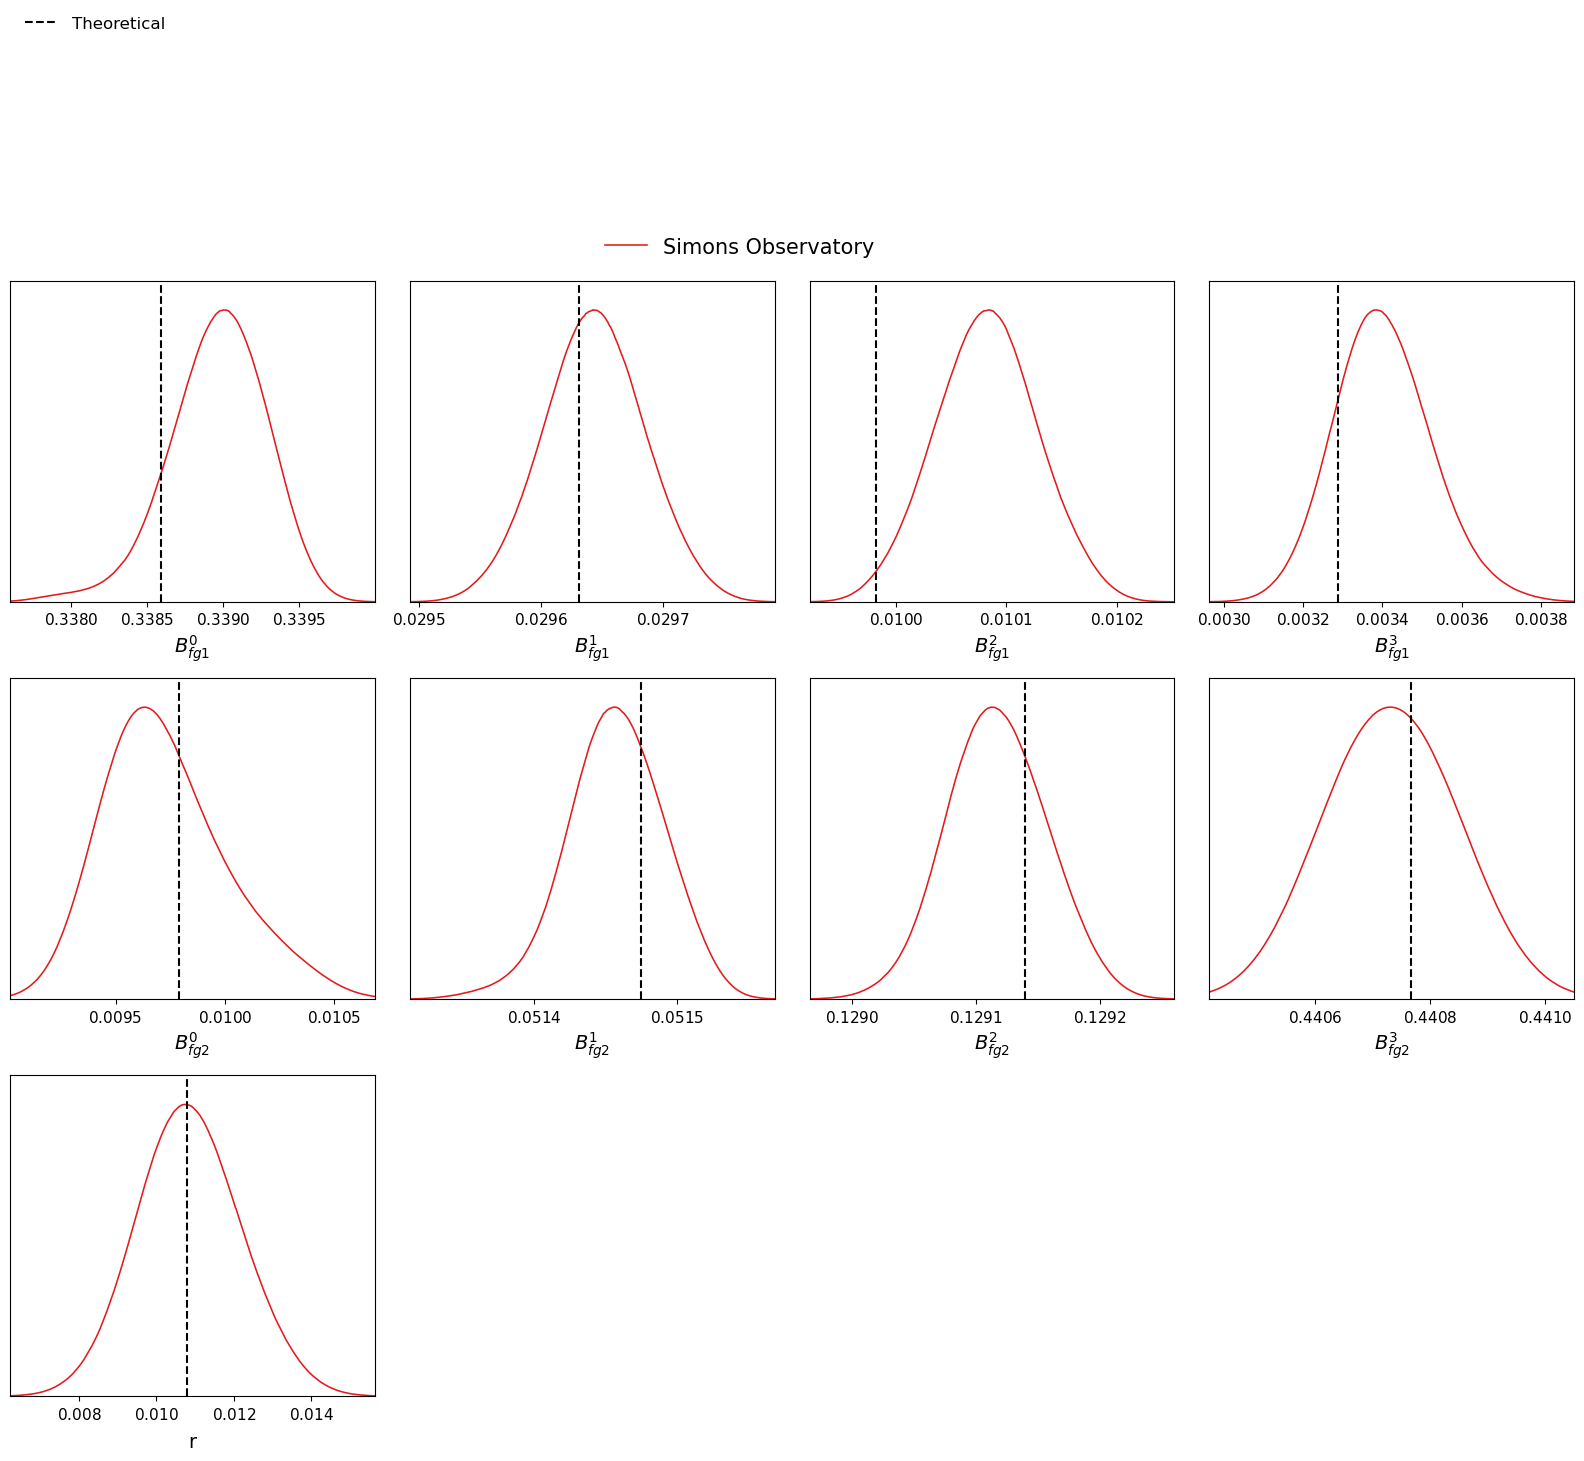

In [117]:
# plt.figure(figsize=(20,15))
# plt.figure(figsize=(40,40))

g_fg1 = plots.get_subplot_plotter(subplot_size=4)
plt.suptitle(f"Mixing matrix elements distribution for Pixel sampling", fontsize=14)



g_fg1.plots_1d([MC_samples], 
                names_samples,
                nx=4,
                colors='Set1', 
                label='Simons Observatory',
                ls=['-'])


axes = g_fg1.subplots.ravel()

for bf in range(MICMAC_sampler_obj.len_params):
    axes[bf].axvline(init_params[bf], color='k', linestyle='--', label='Theoretical')
    # axes[bf].axvline(all_samples[:,bf].mean(), color='r', linestyle='-')

# axes[MICMAC_sampler_obj.len_params].axvline(MICMAC_sampler_obj.r_true, color='k', linestyle='--', label='Theoretical')
axes[MICMAC_sampler_obj.len_params].axvline(all_r_samples[0,-1600:].mean(), color='k', linestyle='--', label='Theoretical')
# axes[MICMAC_sampler_obj.len_params].axvline(all_samples[:,MICMAC_sampler_obj.len_params].mean(), color='r', linestyle='-')

g_fg1.add_legend(['Simons Observatory'], figure=True, legend_loc='center', frameon=False, colored_text=False, fontsize=15)
# g_fg1.add_legend(figure=True, legend_loc='upper center', frameon=False, colored_text=False, fontsize=15)

# plt.legend(['SO'], bbox_to_anchor=(1.04, 1), loc="upper left", prop={'size': 15}, frameon=False)
plt.legend(bbox_to_anchor=(0, 4.35), loc="upper left", prop={'size': 12}, frameon=False)




plt.show()